## Notes:

1. Formula for time taken to label the data = reviewed_time - first_access_time
2. Ids for founders are all less than 200 any id greater than 200 is of a labeler.

## Things to Consider:

1. Since, its manual data that is being labelled how sure are we about the data correctness ??

## Approach

1. First we'll separate the labelled data and the non-labelled data.
2. Analyse the times taken to label the data by a founder and non-founding labeler.
3. Maybe sum the above data by the count of items in a meal, this will give us the times taken to actually label the data by the count of items.
4. Create a suitable dataframe for the kind of data by doing some feature engineering so that the data can be used to build a Model.
5. Analyse the data more in depth to determine the Margin of Error (time in secs) to assign that to the count of items.

In [155]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [25]:
meal_item_custom_addons = pd.read_json('meal_item_custom_addons.jsonl',lines=True)
meal_items = pd.read_json('meal_items.jsonl',lines=True)
meal_photo_queue = pd.read_json('meal_photo_queue.jsonl',lines=True)
meals = pd.read_json('meals.jsonl',lines=True)
patient = pd.read_json('patient.jsonl',lines=True)

In [26]:
meal_item_custom_addons.head()

,id,meal_id,meal_item_id,patient_id,food_name,base_food_name,serving_unit_label,serving_unit_amount,servings,created_time,updated_time
0,14327.0,71924,213930,867cbfb6ed6b6febb8f85ce233bc6dbd,1% milk,milk,cup,244.0,1.000,2023-03-14 14:19:37.589206,2023-03-14 14:19:37.589209
1,14239.0,71820,213602,d280d23710a9c43481ac75959ba3b03e,grilled vegetables,mixed vegetables,cup,140.0,0.500,2023-03-13 21:57:40.614877,2023-03-13 21:57:40.614882
2,11309.0,68289,202672,213b75dc88faa35cf05d216a3067ed67,green pepper,pepper,cup,149.0,0.125,2023-02-23 10:27:08.982920,2023-02-23 10:27:08.982926
3,87.0,50928,146839,dcf315d7bb0eb173f05e8857bdedc82e,white bread,white bread,medium slice,28.0,2.000,2022-09-27 17:06:19.716506,2022-09-27 17:06:19.716509
4,8954.0,64511,191289,ba49a0a694c9e3fa636beb6a75175c13,eggplant,eggplant,cup,99.0,1.000,2023-02-03 13:06:16.380951,2023-02-03 13:06:16.380953


In [27]:
meal_items.head()

,id,meal_id,patient_id,food_name,base_food_name,serving_unit_label,serving_unit_amount,servings,created_time,updated_time
0,250577,83889,8f0273538a091a7a5e1867772d33476e,yellow pepper,pepper,strip,5.00,6.0,2023-05-06 22:00:19.508084,2023-05-06 22:00:19.508095
1,103906,37578,1c3149765ce29df0ddd6a91796f8741a,white burger buns,None,",bun",39.00,1.0,2022-04-28 17:44:38.049728,2022-04-28 17:44:38.049740
2,198117,66844,b36d159905b2d256b1480ccb455044b6,hashbrown,fried potato,regular size,60.00,1.0,2023-02-15 19:18:08.248784,2023-02-15 23:09:52.142397
3,147677,51192,7b68a563c09f9f92e6e7a27469ff1313,hashbrown,fried potato,regular size,60.00,1.0,2022-10-02 00:46:10.091852,2022-10-02 00:47:25.241226
4,250578,83889,8f0273538a091a7a5e1867772d33476e,orange pepper,pepper,strip,2.59,5.0,2023-05-06 22:00:19.567191,2023-05-06 22:00:19.567201


In [28]:
meal_photo_queue.head()

,id,patient_id,queue_type,data_reviewer_id,is_processed,is_reviewed,created_meal_id,reviewed_time,created_time,updated_time,first_reviewer_user_id,first_reviewer_access_time,open_queue_items_when_processed,patient_note
0,49,d82184a766f7ffdd6576ef4c3f1f8ed6,photo_ffe_queue,10.0,True,True,3930,2020-09-13 19:54:04.498592,2020-09-09 20:44:48.879412,2020-09-13 19:54:04.499611,NaN,NaT,NaN,None
1,4,2d2d5ec415602f0181cc01ebe54404a4,photo_ffe_queue,10.0,True,True,3630,2020-08-25 16:18:57.721931,2020-08-25 16:02:40.884615,2020-08-25 16:18:57.723176,NaN,NaT,NaN,None
2,3,bf288e0587c2364f0d64b85d81b3da8a,photo_ffe_queue,10.0,True,True,3623,2020-08-25 16:22:52.588370,2020-08-25 15:46:27.400432,2020-08-25 16:22:52.589960,NaN,NaT,NaN,None
3,5,aa487be0ffaddcfbd102f5e1c4a86ee2,photo_ffe_queue,10.0,True,True,3633,2020-08-25 17:33:11.075321,2020-08-25 17:28:06.071941,2020-08-25 17:33:11.076372,NaN,NaT,NaN,None
4,34,a3f7cd3f02b8e5b78cbf8449410e8e3c,photo_ffe_queue,10.0,True,True,3814,2020-09-02 12:07:54.713802,2020-09-02 05:47:53.105465,2020-09-02 12:07:54.715133,NaN,NaT,NaN,None


In [29]:
meal_photo_queue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67498 entries, 0 to 67497
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   id                               67498 non-null  int64         
 1   patient_id                       67498 non-null  object        
 2   queue_type                       67498 non-null  object        
 3   data_reviewer_id                 52126 non-null  float64       
 4   is_processed                     67498 non-null  bool          
 5   is_reviewed                      67498 non-null  bool          
 6   created_meal_id                  67498 non-null  int64         
 7   reviewed_time                    63341 non-null  datetime64[ns]
 8   created_time                     67498 non-null  datetime64[ns]
 9   updated_time                     67498 non-null  datetime64[ns]
 10  first_reviewer_user_id           40031 non-null  float64  

In [30]:
meal_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167011 entries, 0 to 167010
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   id                   167011 non-null  int64         
 1   meal_id              167011 non-null  int64         
 2   patient_id           167011 non-null  object        
 3   food_name            167011 non-null  object        
 4   base_food_name       160449 non-null  object        
 5   serving_unit_label   167011 non-null  object        
 6   serving_unit_amount  167011 non-null  float64       
 7   servings             167011 non-null  float64       
 8   created_time         167011 non-null  datetime64[ns]
 9   updated_time         167011 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 12.7+ MB


In [31]:
meal_item_custom_addons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198067 entries, 0 to 198066
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   id                   19037 non-null   float64       
 1   meal_id              198067 non-null  int64         
 2   meal_item_id         198067 non-null  int64         
 3   patient_id           198067 non-null  object        
 4   food_name            40908 non-null   object        
 5   base_food_name       38343 non-null   object        
 6   serving_unit_label   19037 non-null   object        
 7   serving_unit_amount  19037 non-null   float64       
 8   servings             19037 non-null   float64       
 9   created_time         198067 non-null  datetime64[ns]
 10  updated_time         198067 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(2), object(4)
memory usage: 16.6+ MB


#### Separating the reviewed and non-reviewed data where the reviewed time and the first_reviewer time is not null

In [41]:
reviewed_df = meal_photo_queue[(meal_photo_queue['reviewed_time'].notnull()) & (meal_photo_queue['first_reviewer_access_time'].notnull())]
non_reviewed_df = meal_photo_queue[~meal_photo_queue['reviewed_time'].notnull()]

In [51]:
non_reviewed_df['first_reviewer_access_time']

1533                           NaT
2417                           NaT
3211                           NaT
5960                           NaT
6560                           NaT
                   ...            
67485                          NaT
67490                          NaT
67494                          NaT
67496                          NaT
67497   2023-05-10 17:10:48.687912
Name: first_reviewer_access_time, Length: 4157, dtype: datetime64[ns]

In [42]:
reviewed_df.rename(columns={'id':'meal_id'},inplace=True)

In [44]:
reviewed_df['queue_type'].value_counts()

photo_ffe_queue    28756
nlp_queue          17137
audio_queue           62
custom                21
Name: queue_type, dtype: int64

In [45]:
reviewed_df['queue_type'] = reviewed_df['queue_type'].map({'photo_ffe_queue': 1,
                                                           'nlp_queue': 2,
                                                           'custom': 3,
                                                           'audio_queue': 4
                                                          })

In [47]:
reviewed_df['first_reviewer_access_time'].isna().sum()

0

In [53]:
reviewed_df[(reviewed_df['data_reviewer_id']<201) & (reviewed_df['first_reviewer_access_time'].notnull())]

,meal_id,patient_id,queue_type,data_reviewer_id,is_processed,is_reviewed,created_meal_id,reviewed_time,created_time,updated_time,first_reviewer_user_id,first_reviewer_access_time,open_queue_items_when_processed,patient_note
3942,3963,78fae5606215907ec124d5d01d8cece3,2,9.0,True,True,12559,2021-03-06 13:09:39.447441,2021-03-06 13:04:04.297712,2022-12-28 22:45:02.103284,754.0,2022-12-28 22:45:02.100291,NaN,None
10650,11062,6c999e4b5204b31e7492388970d15553,1,10.0,True,True,23851,2021-08-25 02:41:22.587681,2021-08-25 02:39:04.874140,2021-08-25 02:41:22.618407,10.0,2021-08-25 02:39:49.093928,0.0,
10655,11367,ccabbb2aa45841e4a6cfb4e126f4a6c6,2,10.0,True,True,24218,2021-09-03 17:05:43.312266,2021-09-03 17:03:50.625671,2021-09-03 17:05:43.344093,10.0,2021-09-03 17:05:23.204231,1.0,One 10 ounces water
10661,11049,8dc076d71fc6faa438fdf727e505dc0e,1,107.0,True,True,23838,2021-08-24 19:09:48.513612,2021-08-24 19:06:29.916598,2021-08-24 19:09:48.515022,107.0,2021-08-24 19:09:48.421113,NaN,
10662,11052,80e68701aa7afb07f0368a2b49407551,1,107.0,True,True,23841,2021-08-24 21:33:32.188948,2021-08-24 21:30:27.301862,2021-08-24 21:33:32.217088,107.0,2021-08-24 21:30:58.820142,1.0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67115,67192,84aee5e367e5848e3ea4bd248c796916,1,10.0,True,True,84310,2023-05-08 22:44:01.769363,2023-05-08 22:41:58.119856,2023-05-08 22:44:01.830934,10.0,2023-05-08 22:42:17.023236,0.0,
67223,67300,84aee5e367e5848e3ea4bd248c796916,1,9.0,True,True,84418,2023-05-09 13:38:19.904105,2023-05-09 13:37:31.206550,2023-05-09 13:38:19.953149,1436.0,2023-05-09 13:37:52.891125,0.0,
67281,67359,84aee5e367e5848e3ea4bd248c796916,1,10.0,True,True,84477,2023-05-09 17:32:15.370577,2023-05-09 17:30:10.688157,2023-05-09 17:32:15.395570,10.0,2023-05-09 17:30:14.248214,0.0,
67339,67418,760a8a951a53ddd9bf273df1b0e444eb,1,10.0,True,True,84536,2023-05-09 21:15:12.674212,2023-05-09 21:12:30.050552,2023-05-09 21:15:12.706348,10.0,2023-05-09 21:13:08.171827,3.0,


#### Another possible df above for the process bypassed by the founding labellers as it contains rows that has null first_reviewer_access_timestamps

#### To be worked on after having discussed with Wolever if I an go ahead with this.

#### Calculating Review time 

In [58]:
reviewed_df['review_time'] = reviewed_df['reviewed_time'] - reviewed_df['first_reviewer_access_time']

In [61]:
reviewed_positive_time_df = reviewed_df[reviewed_df['review_time']>= pd.Timedelta(0)]

In [66]:
reviewed_positive_time_df['review_time'] = reviewed_positive_time_df['review_time'].dt.total_seconds()/60

In [67]:
reviewed_positive_time_df['review_time'].describe()

count    45446.000000
mean         2.541190
std         24.999077
min          0.000000
25%          0.565638
50%          1.460146
75%          2.971847
max       4780.650544
Name: review_time, dtype: float64

<AxesSubplot:xlabel='review_time'>

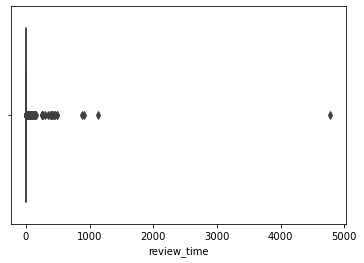

In [68]:
sns.boxplot(x='review_time',data=reviewed_positive_time_df)

### Removing Outliers

In [69]:
outlier_data = reviewed_positive_time_df['review_time']
q1,q3 = np.percentile(outlier_data,[25,75])

In [72]:
iqr = q3-q1

In [74]:
lower_fence = q1-(1.5*iqr)
upper_fence = q3+(1.5*iqr)
print(lower_fence,upper_fence)

-3.0436763979166668 6.581161518750001


In [ ]:
reviewed_positive_time_df['review_time'].rename()

In [79]:
outliers_removed = reviewed_positive_time_df[(reviewed_positive_time_df['review_time']>-3.043) & (reviewed_positive_time_df['review_time']<6.582)]

In [80]:
outliers_removed

,meal_id,patient_id,queue_type,data_reviewer_id,is_processed,is_reviewed,created_meal_id,reviewed_time,created_time,updated_time,first_reviewer_user_id,first_reviewer_access_time,open_queue_items_when_processed,patient_note,review_time
1130,37430,8756e9be5dfd996df26f348cb11da23f,2,NaN,True,True,53133,2022-10-20 23:26:55.538810,2022-10-20 23:26:54.850457,2022-10-20 23:26:55.539884,NaN,2022-10-20 23:26:55.297145,NaN,Bubly,0.004028
5254,43766,87a4062012ab3f71b2da5ce7937b5d6f,2,NaN,True,True,60318,2023-01-03 21:12:09.400443,2023-01-03 21:12:08.777550,2023-01-03 21:12:09.401491,NaN,2023-01-03 21:12:09.154440,NaN,Pear,0.004100
5366,44692,f2049353bed72936e86c68fab4a7bf95,2,NaN,True,True,61262,2023-01-11 16:55:30.940778,2023-01-11 16:55:30.330852,2023-01-11 16:55:30.941689,NaN,2023-01-11 16:55:30.825944,NaN,Coffee,0.001914
7435,44718,9f28804a8fcb88ed727dc1658d4d7e73,1,1225.0,True,True,61288,2023-01-11 19:21:04.968769,2023-01-11 19:20:15.628131,2023-01-11 19:21:07.751610,1436.0,2023-01-11 19:20:41.016323,0.0,,0.399207
10073,13125,5421ee5b39d6f54084b275b1fdd70570,1,440.0,True,True,26214,2021-10-12 18:39:19.447806,2021-10-12 18:38:06.709982,2021-10-12 18:39:19.476960,440.0,2021-10-12 18:38:43.343379,1.0,,0.601740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67489,67568,9a919729baf32e50aba185dcf6e84bda,1,1225.0,True,True,84686,2023-05-10 16:50:14.402066,2023-05-10 16:46:37.626840,2023-05-10 16:50:14.430864,1225.0,2023-05-10 16:46:45.845163,0.0,3 slices,3.475948
67491,67571,f1ab9703188b6d8ccdbcd98719348fe0,2,1225.0,True,True,84689,2023-05-10 16:59:43.808963,2023-05-10 16:58:45.793988,2023-05-10 16:59:43.824298,1225.0,2023-05-10 16:58:50.529097,2.0,"2 slice white toast, peanut butter, syrup",0.887998
67492,67572,f1ab9703188b6d8ccdbcd98719348fe0,2,1436.0,True,True,84690,2023-05-10 17:00:00.685728,2023-05-10 16:59:10.235646,2023-05-10 17:00:00.700283,1436.0,2023-05-10 16:59:18.501409,1.0,"2 slice white toast, peanut butter, syrup",0.703072
67493,67573,f1ab9703188b6d8ccdbcd98719348fe0,2,1225.0,True,True,84691,2023-05-10 17:00:01.668228,2023-05-10 16:59:41.445600,2023-05-10 17:00:01.685030,1225.0,2023-05-10 16:59:47.323150,0.0,1 cup coffee,0.239085


<AxesSubplot:xlabel='review_time'>

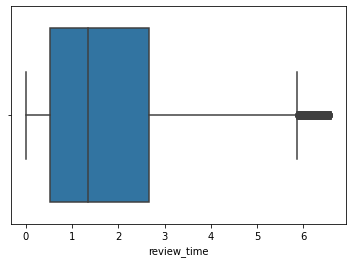

In [81]:
sns.boxplot(x='review_time',data=outliers_removed)

In [82]:
founder_labellers_with_first_reviewer = outliers_removed[(outliers_removed['first_reviewer_user_id']<201) & (outliers_removed['first_reviewer_access_time'].notnull())]
non_founder_labellers_with_first_reviewer = outliers_removed[(outliers_removed['first_reviewer_user_id']>200) & (outliers_removed['first_reviewer_access_time'].notnull())]

In [85]:
founder_labellers_with_first_reviewer

,meal_id,patient_id,queue_type,data_reviewer_id,is_processed,is_reviewed,created_meal_id,reviewed_time,created_time,updated_time,first_reviewer_user_id,first_reviewer_access_time,open_queue_items_when_processed,patient_note,review_time
10650,11062,6c999e4b5204b31e7492388970d15553,1,10.0,True,True,23851,2021-08-25 02:41:22.587681,2021-08-25 02:39:04.874140,2021-08-25 02:41:22.618407,10.0,2021-08-25 02:39:49.093928,0.0,,1.558229
10655,11367,ccabbb2aa45841e4a6cfb4e126f4a6c6,2,10.0,True,True,24218,2021-09-03 17:05:43.312266,2021-09-03 17:03:50.625671,2021-09-03 17:05:43.344093,10.0,2021-09-03 17:05:23.204231,1.0,One 10 ounces water,0.335134
10661,11049,8dc076d71fc6faa438fdf727e505dc0e,1,107.0,True,True,23838,2021-08-24 19:09:48.513612,2021-08-24 19:06:29.916598,2021-08-24 19:09:48.515022,107.0,2021-08-24 19:09:48.421113,NaN,,0.001542
10662,11052,80e68701aa7afb07f0368a2b49407551,1,107.0,True,True,23841,2021-08-24 21:33:32.188948,2021-08-24 21:30:27.301862,2021-08-24 21:33:32.217088,107.0,2021-08-24 21:30:58.820142,1.0,,2.556147
10665,11055,8dc076d71fc6faa438fdf727e505dc0e,1,9.0,True,True,23844,2021-08-25 00:17:21.546263,2021-08-25 00:16:36.814097,2021-08-25 00:17:21.575073,9.0,2021-08-25 00:17:01.153452,0.0,,0.339880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67106,67187,84aee5e367e5848e3ea4bd248c796916,1,9.0,True,True,84305,2023-05-08 22:39:36.307044,2023-05-08 22:38:18.765755,2023-05-08 22:39:36.332604,9.0,2023-05-08 22:38:28.162204,5.0,,1.135747
67115,67192,84aee5e367e5848e3ea4bd248c796916,1,10.0,True,True,84310,2023-05-08 22:44:01.769363,2023-05-08 22:41:58.119856,2023-05-08 22:44:01.830934,10.0,2023-05-08 22:42:17.023236,0.0,,1.745769
67281,67359,84aee5e367e5848e3ea4bd248c796916,1,10.0,True,True,84477,2023-05-09 17:32:15.370577,2023-05-09 17:30:10.688157,2023-05-09 17:32:15.395570,10.0,2023-05-09 17:30:14.248214,0.0,,2.018706
67339,67418,760a8a951a53ddd9bf273df1b0e444eb,1,10.0,True,True,84536,2023-05-09 21:15:12.674212,2023-05-09 21:12:30.050552,2023-05-09 21:15:12.706348,10.0,2023-05-09 21:13:08.171827,3.0,,2.075040


In [88]:
meal_items_appended = meal_item_custom_addons.append(meal_items)
meal_items_appended

,id,meal_id,meal_item_id,patient_id,food_name,base_food_name,serving_unit_label,serving_unit_amount,servings,created_time,updated_time
0,14327.0,71924,213930.0,867cbfb6ed6b6febb8f85ce233bc6dbd,1% milk,milk,cup,244.00,1.000,2023-03-14 14:19:37.589206,2023-03-14 14:19:37.589209
1,14239.0,71820,213602.0,d280d23710a9c43481ac75959ba3b03e,grilled vegetables,mixed vegetables,cup,140.00,0.500,2023-03-13 21:57:40.614877,2023-03-13 21:57:40.614882
2,11309.0,68289,202672.0,213b75dc88faa35cf05d216a3067ed67,green pepper,pepper,cup,149.00,0.125,2023-02-23 10:27:08.982920,2023-02-23 10:27:08.982926
3,87.0,50928,146839.0,dcf315d7bb0eb173f05e8857bdedc82e,white bread,white bread,medium slice,28.00,2.000,2022-09-27 17:06:19.716506,2022-09-27 17:06:19.716509
4,8954.0,64511,191289.0,ba49a0a694c9e3fa636beb6a75175c13,eggplant,eggplant,cup,99.00,1.000,2023-02-03 13:06:16.380951,2023-02-03 13:06:16.380953
...,...,...,...,...,...,...,...,...,...,...,...
167006,250371.0,83825,NaN,bd38f529e11361305fa0408ed92effdb,bagel,white bagel,"medium - 3 1/2"" - 4"" diameter",105.00,1.000,2023-05-06 15:43:00.811862,2023-05-06 21:40:05.461016
167007,250551.0,83814,NaN,6f7bbaa3c081d2e8bc9094a1b6165f8d,"bread, protein, (includes gluten), toasted",white bread,slice,17.00,2.000,2023-05-06 21:49:17.103271,2023-05-06 21:49:24.139685
167008,250572.0,83882,NaN,84aee5e367e5848e3ea4bd248c796916,salt and pepper,herbs and spices,dash,0.40,1.000,2023-05-06 21:56:35.251992,2023-05-06 21:56:47.008797
167009,250573.0,83888,NaN,6f7bbaa3c081d2e8bc9094a1b6165f8d,garlic bread,garlic bread,"medium slice - 4"" x 2 1/2"" x 1 3/4""",88.00,1.000,2023-05-06 21:56:50.532413,2023-05-06 21:56:50.532422


In [90]:
meal_items_appended_with_food_items = meal_items_appended[meal_items_appended['food_name'].notnull()]
meal_items_appended_with_food_items

,id,meal_id,meal_item_id,patient_id,food_name,base_food_name,serving_unit_label,serving_unit_amount,servings,created_time,updated_time
0,14327.0,71924,213930.0,867cbfb6ed6b6febb8f85ce233bc6dbd,1% milk,milk,cup,244.00,1.000,2023-03-14 14:19:37.589206,2023-03-14 14:19:37.589209
1,14239.0,71820,213602.0,d280d23710a9c43481ac75959ba3b03e,grilled vegetables,mixed vegetables,cup,140.00,0.500,2023-03-13 21:57:40.614877,2023-03-13 21:57:40.614882
2,11309.0,68289,202672.0,213b75dc88faa35cf05d216a3067ed67,green pepper,pepper,cup,149.00,0.125,2023-02-23 10:27:08.982920,2023-02-23 10:27:08.982926
3,87.0,50928,146839.0,dcf315d7bb0eb173f05e8857bdedc82e,white bread,white bread,medium slice,28.00,2.000,2022-09-27 17:06:19.716506,2022-09-27 17:06:19.716509
4,8954.0,64511,191289.0,ba49a0a694c9e3fa636beb6a75175c13,eggplant,eggplant,cup,99.00,1.000,2023-02-03 13:06:16.380951,2023-02-03 13:06:16.380953
...,...,...,...,...,...,...,...,...,...,...,...
167006,250371.0,83825,NaN,bd38f529e11361305fa0408ed92effdb,bagel,white bagel,"medium - 3 1/2"" - 4"" diameter",105.00,1.000,2023-05-06 15:43:00.811862,2023-05-06 21:40:05.461016
167007,250551.0,83814,NaN,6f7bbaa3c081d2e8bc9094a1b6165f8d,"bread, protein, (includes gluten), toasted",white bread,slice,17.00,2.000,2023-05-06 21:49:17.103271,2023-05-06 21:49:24.139685
167008,250572.0,83882,NaN,84aee5e367e5848e3ea4bd248c796916,salt and pepper,herbs and spices,dash,0.40,1.000,2023-05-06 21:56:35.251992,2023-05-06 21:56:47.008797
167009,250573.0,83888,NaN,6f7bbaa3c081d2e8bc9094a1b6165f8d,garlic bread,garlic bread,"medium slice - 4"" x 2 1/2"" x 1 3/4""",88.00,1.000,2023-05-06 21:56:50.532413,2023-05-06 21:56:50.532422


### Grouping the meals by their count

In [92]:
meals_grouped_df = meal_items_appended_with_food_items.groupby('meal_id')['food_name'].count().reset_index()
meals_grouped_df

,meal_id,food_name
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
...,...,...
80238,84691,1
80239,84692,1
80240,84693,4
80241,84694,2


In [93]:
outliers_removed.shape

(43098, 15)

In [94]:
meals_grouped_df.shape

(80243, 2)

In [97]:
outliers_removed.head()

,meal_id,patient_id,queue_type,data_reviewer_id,is_processed,is_reviewed,created_meal_id,reviewed_time,created_time,updated_time,first_reviewer_user_id,first_reviewer_access_time,open_queue_items_when_processed,patient_note,review_time
1130,37430,8756e9be5dfd996df26f348cb11da23f,2,NaN,True,True,53133,2022-10-20 23:26:55.538810,2022-10-20 23:26:54.850457,2022-10-20 23:26:55.539884,NaN,2022-10-20 23:26:55.297145,NaN,Bubly,0.004028
5254,43766,87a4062012ab3f71b2da5ce7937b5d6f,2,NaN,True,True,60318,2023-01-03 21:12:09.400443,2023-01-03 21:12:08.777550,2023-01-03 21:12:09.401491,NaN,2023-01-03 21:12:09.154440,NaN,Pear,0.004100
5366,44692,f2049353bed72936e86c68fab4a7bf95,2,NaN,True,True,61262,2023-01-11 16:55:30.940778,2023-01-11 16:55:30.330852,2023-01-11 16:55:30.941689,NaN,2023-01-11 16:55:30.825944,NaN,Coffee,0.001914
7435,44718,9f28804a8fcb88ed727dc1658d4d7e73,1,1225.0,True,True,61288,2023-01-11 19:21:04.968769,2023-01-11 19:20:15.628131,2023-01-11 19:21:07.751610,1436.0,2023-01-11 19:20:41.016323,0.0,,0.399207
10073,13125,5421ee5b39d6f54084b275b1fdd70570,1,440.0,True,True,26214,2021-10-12 18:39:19.447806,2021-10-12 18:38:06.709982,2021-10-12 18:39:19.476960,440.0,2021-10-12 18:38:43.343379,1.0,,0.601740


In [98]:
meals_grouped_df.head()

,meal_id,food_name
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1


In [99]:
merged_df = outliers_removed.merge(meals_grouped_df, on='meal_id', how='left')

In [100]:
merged_df

,meal_id,patient_id,queue_type,data_reviewer_id,is_processed,is_reviewed,created_meal_id,reviewed_time,created_time,updated_time,first_reviewer_user_id,first_reviewer_access_time,open_queue_items_when_processed,patient_note,review_time,food_name
0,37430,8756e9be5dfd996df26f348cb11da23f,2,NaN,True,True,53133,2022-10-20 23:26:55.538810,2022-10-20 23:26:54.850457,2022-10-20 23:26:55.539884,NaN,2022-10-20 23:26:55.297145,NaN,Bubly,0.004028,4.0
1,43766,87a4062012ab3f71b2da5ce7937b5d6f,2,NaN,True,True,60318,2023-01-03 21:12:09.400443,2023-01-03 21:12:08.777550,2023-01-03 21:12:09.401491,NaN,2023-01-03 21:12:09.154440,NaN,Pear,0.004100,1.0
2,44692,f2049353bed72936e86c68fab4a7bf95,2,NaN,True,True,61262,2023-01-11 16:55:30.940778,2023-01-11 16:55:30.330852,2023-01-11 16:55:30.941689,NaN,2023-01-11 16:55:30.825944,NaN,Coffee,0.001914,1.0
3,44718,9f28804a8fcb88ed727dc1658d4d7e73,1,1225.0,True,True,61288,2023-01-11 19:21:04.968769,2023-01-11 19:20:15.628131,2023-01-11 19:21:07.751610,1436.0,2023-01-11 19:20:41.016323,0.0,,0.399207,NaN
4,13125,5421ee5b39d6f54084b275b1fdd70570,1,440.0,True,True,26214,2021-10-12 18:39:19.447806,2021-10-12 18:38:06.709982,2021-10-12 18:39:19.476960,440.0,2021-10-12 18:38:43.343379,1.0,,0.601740,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43093,67568,9a919729baf32e50aba185dcf6e84bda,1,1225.0,True,True,84686,2023-05-10 16:50:14.402066,2023-05-10 16:46:37.626840,2023-05-10 16:50:14.430864,1225.0,2023-05-10 16:46:45.845163,0.0,3 slices,3.475948,4.0
43094,67571,f1ab9703188b6d8ccdbcd98719348fe0,2,1225.0,True,True,84689,2023-05-10 16:59:43.808963,2023-05-10 16:58:45.793988,2023-05-10 16:59:43.824298,1225.0,2023-05-10 16:58:50.529097,2.0,"2 slice white toast, peanut butter, syrup",0.887998,6.0
43095,67572,f1ab9703188b6d8ccdbcd98719348fe0,2,1436.0,True,True,84690,2023-05-10 17:00:00.685728,2023-05-10 16:59:10.235646,2023-05-10 17:00:00.700283,1436.0,2023-05-10 16:59:18.501409,1.0,"2 slice white toast, peanut butter, syrup",0.703072,5.0
43096,67573,f1ab9703188b6d8ccdbcd98719348fe0,2,1225.0,True,True,84691,2023-05-10 17:00:01.668228,2023-05-10 16:59:41.445600,2023-05-10 17:00:01.685030,1225.0,2023-05-10 16:59:47.323150,0.0,1 cup coffee,0.239085,1.0


In [102]:
merged_df.rename(columns={'food_name':'food_items_count'},inplace=True)

In [105]:
merged_df

,meal_id,patient_id,queue_type,data_reviewer_id,is_processed,is_reviewed,created_meal_id,reviewed_time,created_time,updated_time,first_reviewer_user_id,first_reviewer_access_time,open_queue_items_when_processed,patient_note,review_time,food_items_count
0,37430,8756e9be5dfd996df26f348cb11da23f,2,NaN,True,True,53133,2022-10-20 23:26:55.538810,2022-10-20 23:26:54.850457,2022-10-20 23:26:55.539884,NaN,2022-10-20 23:26:55.297145,NaN,Bubly,0.004028,4.0
1,43766,87a4062012ab3f71b2da5ce7937b5d6f,2,NaN,True,True,60318,2023-01-03 21:12:09.400443,2023-01-03 21:12:08.777550,2023-01-03 21:12:09.401491,NaN,2023-01-03 21:12:09.154440,NaN,Pear,0.004100,1.0
2,44692,f2049353bed72936e86c68fab4a7bf95,2,NaN,True,True,61262,2023-01-11 16:55:30.940778,2023-01-11 16:55:30.330852,2023-01-11 16:55:30.941689,NaN,2023-01-11 16:55:30.825944,NaN,Coffee,0.001914,1.0
3,44718,9f28804a8fcb88ed727dc1658d4d7e73,1,1225.0,True,True,61288,2023-01-11 19:21:04.968769,2023-01-11 19:20:15.628131,2023-01-11 19:21:07.751610,1436.0,2023-01-11 19:20:41.016323,0.0,,0.399207,NaN
4,13125,5421ee5b39d6f54084b275b1fdd70570,1,440.0,True,True,26214,2021-10-12 18:39:19.447806,2021-10-12 18:38:06.709982,2021-10-12 18:39:19.476960,440.0,2021-10-12 18:38:43.343379,1.0,,0.601740,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43093,67568,9a919729baf32e50aba185dcf6e84bda,1,1225.0,True,True,84686,2023-05-10 16:50:14.402066,2023-05-10 16:46:37.626840,2023-05-10 16:50:14.430864,1225.0,2023-05-10 16:46:45.845163,0.0,3 slices,3.475948,4.0
43094,67571,f1ab9703188b6d8ccdbcd98719348fe0,2,1225.0,True,True,84689,2023-05-10 16:59:43.808963,2023-05-10 16:58:45.793988,2023-05-10 16:59:43.824298,1225.0,2023-05-10 16:58:50.529097,2.0,"2 slice white toast, peanut butter, syrup",0.887998,6.0
43095,67572,f1ab9703188b6d8ccdbcd98719348fe0,2,1436.0,True,True,84690,2023-05-10 17:00:00.685728,2023-05-10 16:59:10.235646,2023-05-10 17:00:00.700283,1436.0,2023-05-10 16:59:18.501409,1.0,"2 slice white toast, peanut butter, syrup",0.703072,5.0
43096,67573,f1ab9703188b6d8ccdbcd98719348fe0,2,1225.0,True,True,84691,2023-05-10 17:00:01.668228,2023-05-10 16:59:41.445600,2023-05-10 17:00:01.685030,1225.0,2023-05-10 16:59:47.323150,0.0,1 cup coffee,0.239085,1.0


In [119]:
train_set = merged_df[['queue_type','food_items_count','review_time']]
train_set

,queue_type,food_items_count,review_time
0,2,4.0,0.004028
1,2,1.0,0.004100
2,2,1.0,0.001914
3,1,NaN,0.399207
4,1,1.0,0.601740
...,...,...,...
43093,1,4.0,3.475948
43094,2,6.0,0.887998
43095,2,5.0,0.703072
43096,2,1.0,0.239085


<AxesSubplot:xlabel='review_time', ylabel='food_items_count'>

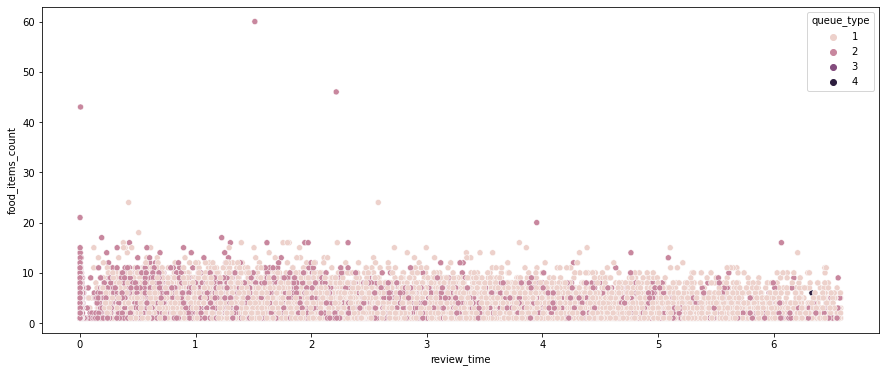

In [160]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='review_time',y='food_items_count',hue='queue_type',data=train_set)

In [112]:
non_reviewed_df.rename(columns={'id':'meal_id'},inplace=True)

In [113]:
test_set = non_reviewed_df.merge(meals_grouped_df,on='meal_id',how='left')
test_set

,meal_id,patient_id,queue_type,data_reviewer_id,is_processed,is_reviewed,created_meal_id,reviewed_time,created_time,updated_time,first_reviewer_user_id,first_reviewer_access_time,open_queue_items_when_processed,patient_note,food_name
0,47356,bb839506448d55b368ddcadb63dae6b1,custom,NaN,True,True,63929,NaT,2023-01-30 12:59:07.980170,2023-01-30 12:59:07.980170,NaN,NaT,0.0,logged from recent items,4.0
1,51530,a16d8d31e4a40857abed6e68609f3ec9,custom,NaN,True,True,68376,NaT,2023-02-23 16:20:32.050492,2023-02-23 16:20:32.050492,NaN,NaT,1.0,logged from recent items,6.0
2,3151,d34b231166777c5d7c454341dd62086d,nlp_queue,NaN,True,False,11410,NaT,2021-02-25 12:27:34.858238,2021-02-25 12:27:34.858244,NaN,NaT,NaN,None,NaN
3,50718,322d4f937aa52890808dd49aee4c7a2d,custom,NaN,True,True,67564,NaT,2023-02-19 04:42:51.955203,2023-02-19 04:42:51.955203,NaN,NaT,0.0,logged from recent items,1.0
4,44659,788ac3f6e7d31ba58d719be76152c802,custom,NaN,True,True,59524,NaT,2023-01-10 05:00:00.002000,2023-01-10 05:00:00.002000,NaN,NaT,NaN,None,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4152,67566,abf8d2cbdaa83bb6d3194e93cf888c68,custom,NaN,True,True,84684,NaT,2023-05-10 16:42:26.733881,2023-05-10 16:42:26.733881,NaN,NaT,0.0,logged from recent items,3.0
4153,67570,e11514a58793b00fa3001ea68c852e4a,custom,NaN,True,True,84688,NaT,2023-05-10 16:57:40.955822,2023-05-10 16:57:40.955822,NaN,NaT,0.0,logged from recent items,1.0
4154,67575,50ee940c542136d7e883606e3e29429e,custom,NaN,True,True,84693,NaT,2023-05-10 17:06:34.009693,2023-05-10 17:06:34.009693,NaN,NaT,0.0,logged from recent items,2.0
4155,67576,50ee940c542136d7e883606e3e29429e,custom,NaN,True,True,84694,NaT,2023-05-10 17:06:56.477522,2023-05-10 17:06:56.477522,NaN,NaT,0.0,logged from recent items,2.0


In [114]:
test_set['queue_type'] = test_set['queue_type'].map({'photo_ffe_queue': 1,
                                                           'nlp_queue': 2,
                                                           'custom': 3,
                                                           'audio_queue': 4
                                                          })

In [117]:
test_set.rename(columns={'food_name':'food_items_count'},inplace=True)

In [121]:
test_set = test_set[['queue_type','food_items_count']]
test_set

,queue_type,food_items_count
0,3,4.0
1,3,6.0
2,2,NaN
3,3,1.0
4,3,1.0
...,...,...
4152,3,3.0
4153,3,1.0
4154,3,2.0
4155,3,2.0


### Removing NaN values from train and test set.

In [122]:
train_set.isna().sum()

queue_type             0
food_items_count    2272
review_time            0
dtype: int64

In [125]:
train_set.dropna(inplace=True)

In [123]:
test_set.isna().sum()

queue_type            0
food_items_count    256
dtype: int64

In [126]:
test_set.dropna(inplace=True)

In [127]:
train_set.isna().sum()

queue_type          0
food_items_count    0
review_time         0
dtype: int64

In [128]:
test_set.isna().sum()

queue_type          0
food_items_count    0
dtype: int64

In [129]:
train_set.shape

(40826, 3)

In [130]:
test_set.shape

(3901, 2)

In [162]:
X, y = train_set[['queue_type','food_items_count']], train_set['review_time']

#### I intitally thought that I'll use the non-reviewed set as a test set but after having made a model and having checked its accuracy I need to tune the model a bit more for the hyper-parameters, so that will be my next step.

#### Next Steps:
1. Perform a train test split for the training data and test it on a labelled sample to check the accuracy.
2. Try assessing the accuracy with cross-validation.
3. Try GridSearchCV or RandomizedSearchCV for optimizing and tuning the paramters for selecting the best paramaters.
4. Train the model again and assess it.
5. Work on the Margin of Error.

In [185]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [187]:
lr = LinearRegression()

In [190]:
lr.fit(X_train,y_train)

LinearRegression()

In [193]:
pred_lr = lr.predict(X_test)

In [194]:
print('Accuracy :',(r2_score(y_test,pred_lr))*100)

Accuracy : 13.225673887663724


In [150]:
dtr.predict(test_set)

array([0.04583333, 1.01301923, 0.04583333, ..., 0.04583333, 0.04583333,
       2.2407867 ])

In [151]:
test_set

,queue_type,food_items_count
0,3,4.00
1,3,6.00
3,3,1.00
4,3,1.00
5,3,4.00
...,...,...
4152,3,3.00
4153,3,1.00
4154,3,2.00
4155,3,2.00
